In [35]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import geopandas as gpd
import mapclassify

In [42]:
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
world.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 177 entries, 0 to 176
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   pop_est     177 non-null    int64   
 1   continent   177 non-null    object  
 2   name        177 non-null    object  
 3   iso_a3      177 non-null    object  
 4   gdp_md_est  177 non-null    float64 
 5   geometry    177 non-null    geometry
dtypes: float64(1), geometry(1), int64(1), object(3)
memory usage: 8.4+ KB


In [6]:
wine = pd.read_csv('/Users/stefanhall/Documents/Studies/MDSI/DVN/AT3 Data/winemag-data-130k-v2.csv')
wine.head()

,Unnamed: 0,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
0,0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,NaN,Sicily & Sardinia,Etna,NaN,Kerin O’Keefe,@kerinokeefe,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia
1,1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.0,Douro,NaN,NaN,Roger Voss,@vossroger,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos
2,2,US,"Tart and snappy, the flavors of lime flesh and...",NaN,87,14.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm
3,3,US,"Pineapple rind, lemon pith and orange blossom ...",Reserve Late Harvest,87,13.0,Michigan,Lake Michigan Shore,NaN,Alexander Peartree,NaN,St. Julian 2013 Reserve Late Harvest Riesling ...,Riesling,St. Julian
4,4,US,"Much like the regular bottling from 2012, this...",Vintner's Reserve Wild Child Block,87,65.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks


In [8]:
world['name'].unique()

array(['Fiji', 'Tanzania', 'W. Sahara', 'Canada',
       'United States of America', 'Kazakhstan', 'Uzbekistan',
       'Papua New Guinea', 'Indonesia', 'Argentina', 'Chile',
       'Dem. Rep. Congo', 'Somalia', 'Kenya', 'Sudan', 'Chad', 'Haiti',
       'Dominican Rep.', 'Russia', 'Bahamas', 'Falkland Is.', 'Norway',
       'Greenland', 'Fr. S. Antarctic Lands', 'Timor-Leste',
       'South Africa', 'Lesotho', 'Mexico', 'Uruguay', 'Brazil',
       'Bolivia', 'Peru', 'Colombia', 'Panama', 'Costa Rica', 'Nicaragua',
       'Honduras', 'El Salvador', 'Guatemala', 'Belize', 'Venezuela',
       'Guyana', 'Suriname', 'France', 'Ecuador', 'Puerto Rico',
       'Jamaica', 'Cuba', 'Zimbabwe', 'Botswana', 'Namibia', 'Senegal',
       'Mali', 'Mauritania', 'Benin', 'Niger', 'Nigeria', 'Cameroon',
       'Togo', 'Ghana', "Côte d'Ivoire", 'Guinea', 'Guinea-Bissau',
       'Liberia', 'Sierra Leone', 'Burkina Faso', 'Central African Rep.',
       'Congo', 'Gabon', 'Eq. Guinea', 'Zambia', 'Malawi', 'M

In [19]:
#find the countries that aren't in the geopandas
wineassig = wine.assign(inworld =wine.country.isin(world.name))
notin = wineassig[(wineassig['inworld']==False)]
notin['country'].unique()

array(['US', nan, 'Czech Republic', 'England', 'Bosnia and Herzegovina'],
      dtype=object)

In [23]:
#Change the names of countries that are not in the geopandas series
wine.loc[wine.country == 'US', "country"] = "United States of America"
wine.loc[wine.country == 'Czech Republic', "country"] = "Czechia"
wine.loc[wine.country == 'England', "country"] = "United Kingdom"
wine.loc[wine.country == 'Bosnia and Herzegovina', "country"] = "Bosnia and Herz."

In [41]:
#create the df which we'll use for the choropleth
winemap = wine.groupby('country').mean()
winemap = winemap[['price','points']]
winemap.dropna(inplace=True)
winemap.info()

<class 'pandas.core.frame.DataFrame'>
Index: 42 entries, Argentina to Uruguay
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   price   42 non-null     float64
 1   points  42 non-null     float64
dtypes: float64(2)
memory usage: 1008.0+ bytes


In [57]:
fortheplot = world.merge(winemap, left_on = 'name', right_on = 'country', how = 'left')
fortheplot.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Int64Index: 177 entries, 0 to 176
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   pop_est     177 non-null    int64   
 1   continent   177 non-null    object  
 2   name        177 non-null    object  
 3   iso_a3      177 non-null    object  
 4   gdp_md_est  177 non-null    float64 
 5   geometry    177 non-null    geometry
 6   price       42 non-null     float64 
 7   points      42 non-null     float64 
dtypes: float64(3), geometry(1), int64(1), object(3)
memory usage: 12.4+ KB


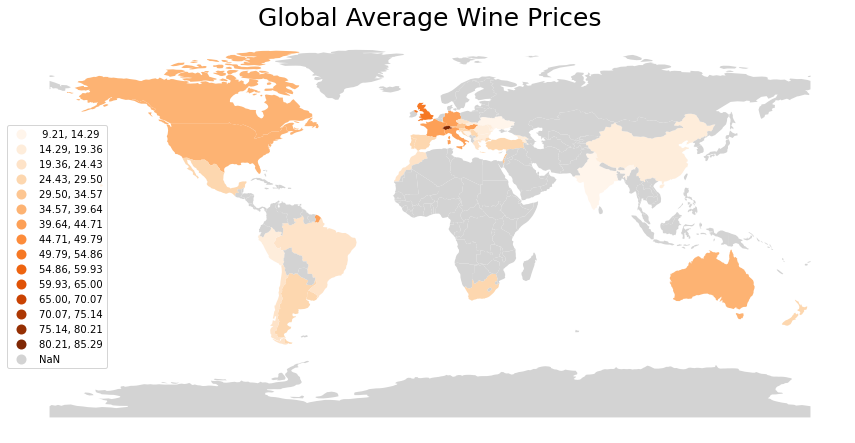

In [174]:
ax = fortheplot.plot(column='price', cmap =    
                                'Oranges', figsize=(15,9),   
                                 scheme='equalinterval',k=15, legend =  
                                  True, missing_kwds={'color': 'lightgrey'});
#add title to the map
ax.set_title('Global Average Wine Prices', fontdict= 
            {'fontsize':25})
#remove axes
ax.set_axis_off()
#move legend to an empty space
ax.get_legend().set_bbox_to_anchor((.12,.78))


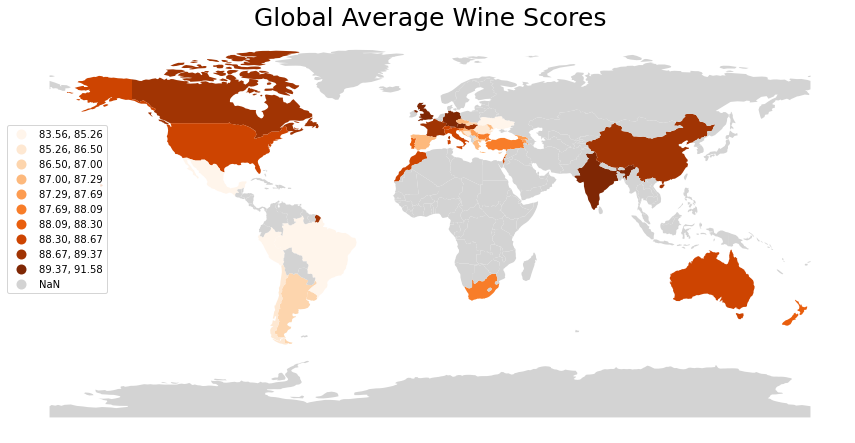

In [175]:
ax = fortheplot.plot(column='points', cmap =    
                                'Oranges', figsize=(15,9),   
                                 scheme='jenks_caspall',k=10, legend =  
                                  True, missing_kwds={'color': 'lightgrey'});
#add title to the map
ax.set_title('Global Average Wine Scores', fontdict= 
            {'fontsize':25})
#remove axes
ax.set_axis_off()
#move legend to an empty space
ax.get_legend().set_bbox_to_anchor((.12,.78))


In [94]:
fortheplot['pointsper'] = fortheplot['points']/fortheplot['price']

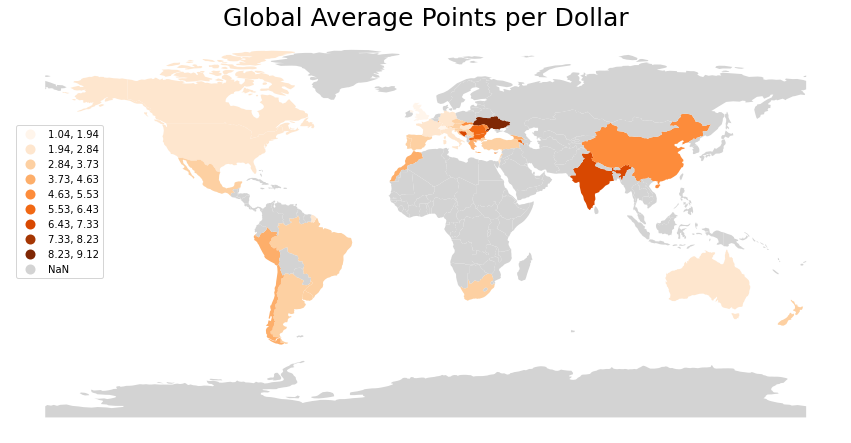

In [171]:
ax = fortheplot.plot(column='pointsper', cmap =    
                                'Oranges', figsize=(15,9),   
                                 scheme='equalinterval',k=9, legend =  
                                  True, missing_kwds={'color': 'lightgrey'});
#add title to the map
ax.set_title('Global Average Points per Dollar', fontdict= 
            {'fontsize':25})
#remove axes
ax.set_axis_off()
#move legend to an empty space
ax.get_legend().set_bbox_to_anchor((.12,.78))


In [96]:
fortheplot['dollarsper'] = fortheplot['price']/fortheplot['points']

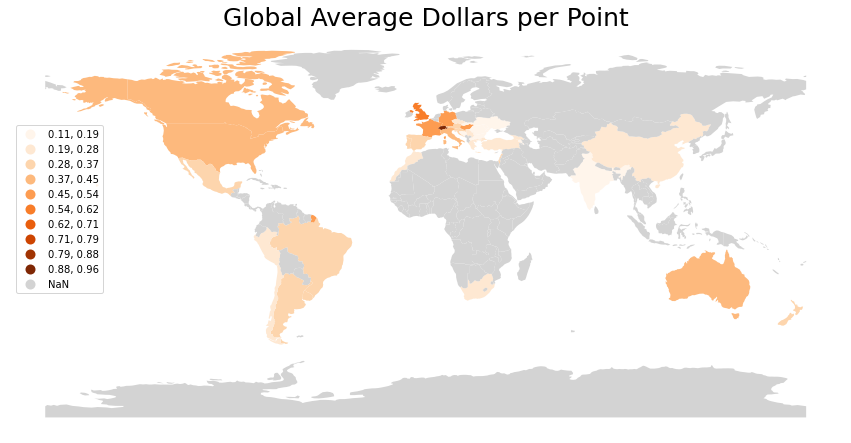

In [172]:
ax = fortheplot.plot(column='dollarsper', cmap =    
                                'Oranges', figsize=(15,9),   
                                 scheme='equalinterval',k=10, legend =  
                                  True, missing_kwds={'color': 'lightgrey'});
#add title to the map
ax.set_title('Global Average Dollars per Point', fontdict= 
            {'fontsize':25})
#remove axes
ax.set_axis_off()
#move legend to an empty space
ax.get_legend().set_bbox_to_anchor((.12,.78))


In [118]:
cons = pd.read_csv('/Users/stefanhall/Documents/Studies/MDSI/DVN/DVN_AT3/src/data/consumption.csv')
cons.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 193 entries, 0 to 192
Data columns (total 6 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   country                       193 non-null    object 
 1   beer_servings                 193 non-null    int64  
 2   spirit_servings               193 non-null    int64  
 3   wine_servings                 193 non-null    int64  
 4   total_litres_of_pure_alcohol  193 non-null    float64
 5   continent                     193 non-null    object 
dtypes: float64(1), int64(3), object(2)
memory usage: 9.2+ KB


In [121]:
#Find the consumption of wine per country

cons = cons[['country','wine_servings']]
cons['wine_litres'] = cons['wine_servings']*0.15 #the average serving of wine is 150ml

,country,wine_servings,wine_litres
0,Afghanistan,0,0.00
1,Albania,54,8.10
2,Algeria,14,2.10
3,Andorra,312,46.80
4,Angola,45,6.75
...,...,...,...
188,Venezuela,3,0.45
189,Vietnam,1,0.15
190,Yemen,0,0.00
191,Zambia,4,0.60


In [132]:
a = world['name'].unique()
print(sorted(a))

['Afghanistan', 'Albania', 'Algeria', 'Angola', 'Antarctica', 'Argentina', 'Armenia', 'Australia', 'Austria', 'Azerbaijan', 'Bahamas', 'Bangladesh', 'Belarus', 'Belgium', 'Belize', 'Benin', 'Bhutan', 'Bolivia', 'Bosnia and Herz.', 'Botswana', 'Brazil', 'Brunei', 'Bulgaria', 'Burkina Faso', 'Burundi', 'Cambodia', 'Cameroon', 'Canada', 'Central African Rep.', 'Chad', 'Chile', 'China', 'Colombia', 'Congo', 'Costa Rica', 'Croatia', 'Cuba', 'Cyprus', 'Czechia', "Côte d'Ivoire", 'Dem. Rep. Congo', 'Denmark', 'Djibouti', 'Dominican Rep.', 'Ecuador', 'Egypt', 'El Salvador', 'Eq. Guinea', 'Eritrea', 'Estonia', 'Ethiopia', 'Falkland Is.', 'Fiji', 'Finland', 'Fr. S. Antarctic Lands', 'France', 'Gabon', 'Gambia', 'Georgia', 'Germany', 'Ghana', 'Greece', 'Greenland', 'Guatemala', 'Guinea', 'Guinea-Bissau', 'Guyana', 'Haiti', 'Honduras', 'Hungary', 'Iceland', 'India', 'Indonesia', 'Iran', 'Iraq', 'Ireland', 'Israel', 'Italy', 'Jamaica', 'Japan', 'Jordan', 'Kazakhstan', 'Kenya', 'Kosovo', 'Kuwait', '

In [134]:
consassig = cons.assign(inworld=cons.country.isin(world.name))
notincons = consassig[(consassig['inworld']==False)]
notincons['country'].unique()

array(['A', 'Bahrain', 'Sao Tome & Principe', 'Seychelles', 'Singapore'],
      dtype=object)

In [133]:
cons.loc[cons.country == 'Andorra', "country"] = "A"
cons.loc[cons.country == 'Antigua & Barbuda', "country"] = "A"
cons.loc[cons.country == 'Barbados', "country"] = "A"
cons.loc[cons.country == 'Bosnia-Herzegovina', "country"] = "Bosnia and Herz."
cons.loc[cons.country == "Cote d'Ivoire", "country"] = "Côte d'Ivoire"
cons.loc[cons.country == 'Cabo Verde', "country"] = "A"
cons.loc[cons.country == 'Central African Republic', "country"] = "Central African Rep."
cons.loc[cons.country == 'Comoros', "country"] = "A"
cons.loc[cons.country == 'Cook Islands', "country"] = "A"
cons.loc[cons.country == 'Czech Republic', "country"] = "Czechia"
cons.loc[cons.country == 'DR Congo', "country"] = "Dem. Rep. Congo"
cons.loc[cons.country == 'Dominica', "country"] = "A"
cons.loc[cons.country == 'Dominican Republic', "country"] = "Dominican Rep."
cons.loc[cons.country == 'Equatorial Guinea', "country"] = "Eq. Guinea"
cons.loc[cons.country == 'Grenada', "country"] = "A"
cons.loc[cons.country == 'Kiribati', "country"] = "A"
cons.loc[cons.country == 'Maldives', "country"] = "A"
cons.loc[cons.country == 'Malta', "country"] = "A"
cons.loc[cons.country == 'Marshall Islands', "country"] = "A"
cons.loc[cons.country == 'Mauritius', "country"] = "A"
cons.loc[cons.country == 'Micronesia', "country"] = "A"
cons.loc[cons.country == 'Monaco', "country"] = "A"
cons.loc[cons.country == 'Nauru', "country"] = "A"
cons.loc[cons.country == 'Niue', "country"] = "A"
cons.loc[cons.country == 'Palau', "country"] = "A"
cons.loc[cons.country == 'Russian Federation', "country"] = "Russia"
cons.loc[cons.country == 'St. Kitts & Nevis', "country"] = "A"
cons.loc[cons.country == 'St. Lucia', "country"] = "A"
cons.loc[cons.country == 'St. Vincent & the Grenadines', "country"] = "A"
cons.loc[cons.country == 'Samoa', "country"] = "A"
cons.loc[cons.country == 'San Marino', "country"] = "A"
cons.loc[cons.country == 'Solomon Islands', "country"] = "Solomon Is."
cons.loc[cons.country == 'Swaziland', "country"] = "A"
cons.loc[cons.country == 'Tonga', "country"] = "A"
cons.loc[cons.country == 'Trinidad & Tobago', "country"] = "Trinidad and Tobago"
cons.loc[cons.country == 'Tuvalu', "country"] = "A"
cons.loc[cons.country == 'USA', "country"] = "United States of America"

In [139]:
consplot = world.merge(cons, left_on = 'name', right_on = 'country', how = 'left')

consplot.head()

,pop_est,continent,name,iso_a3,gdp_md_est,geometry,country,wine_servings,wine_litres
0,920938,Oceania,Fiji,FJI,8374.0,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000...",Fiji,1.0,0.15
1,53950935,Africa,Tanzania,TZA,150600.0,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982...",Tanzania,1.0,0.15
2,603253,Africa,W. Sahara,ESH,906.5,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948...",NaN,NaN,NaN
3,35623680,North America,Canada,CAN,1674000.0,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742...",Canada,100.0,15.00
4,326625791,North America,United States of America,USA,18560000.0,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000...",United States of America,84.0,12.60


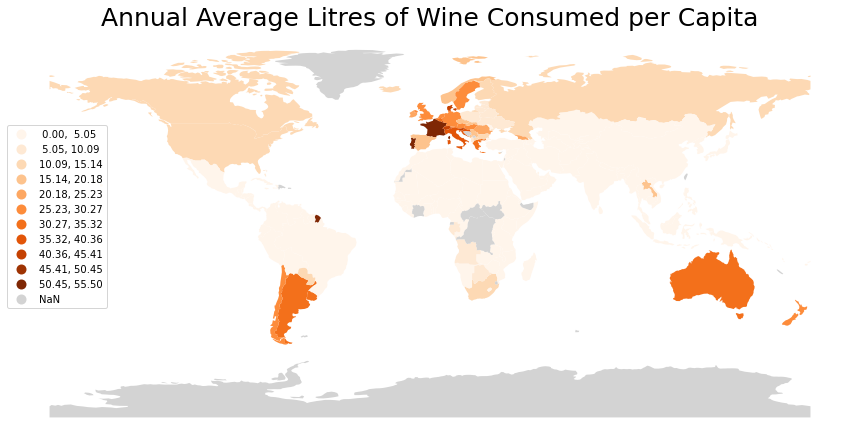

In [187]:
ax = consplot.plot(column='wine_litres', cmap =    
                                'Oranges', figsize=(15,9),   
                                 scheme='equalinterval',k=11, legend =  
                                  True, missing_kwds={'color': 'lightgrey'});
#add title to the map
ax.set_title('Annual Average Litres of Wine Consumed per Capita', fontdict= 
            {'fontsize':25})
#remove axes
ax.set_axis_off()
#move legend to an empty space
ax.get_legend().set_bbox_to_anchor((.12,.78))


In [181]:
prod = pd.read_csv('/Users/stefanhall/Documents/Studies/MDSI/DVN/DVN_AT3/src/data/production.csv')
prod.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53 entries, 0 to 52
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   country      53 non-null     object 
 1   global_area  53 non-null     float64
 2   global_prod  53 non-null     float64
dtypes: float64(2), object(1)
memory usage: 1.4+ KB


In [184]:
a = world['name'].unique()
print(sorted(a))

['Afghanistan', 'Albania', 'Algeria', 'Angola', 'Antarctica', 'Argentina', 'Armenia', 'Australia', 'Austria', 'Azerbaijan', 'Bahamas', 'Bangladesh', 'Belarus', 'Belgium', 'Belize', 'Benin', 'Bhutan', 'Bolivia', 'Bosnia and Herz.', 'Botswana', 'Brazil', 'Brunei', 'Bulgaria', 'Burkina Faso', 'Burundi', 'Cambodia', 'Cameroon', 'Canada', 'Central African Rep.', 'Chad', 'Chile', 'China', 'Colombia', 'Congo', 'Costa Rica', 'Croatia', 'Cuba', 'Cyprus', 'Czechia', "Côte d'Ivoire", 'Dem. Rep. Congo', 'Denmark', 'Djibouti', 'Dominican Rep.', 'Ecuador', 'Egypt', 'El Salvador', 'Eq. Guinea', 'Eritrea', 'Estonia', 'Ethiopia', 'Falkland Is.', 'Fiji', 'Finland', 'Fr. S. Antarctic Lands', 'France', 'Gabon', 'Gambia', 'Georgia', 'Germany', 'Ghana', 'Greece', 'Greenland', 'Guatemala', 'Guinea', 'Guinea-Bissau', 'Guyana', 'Haiti', 'Honduras', 'Hungary', 'Iceland', 'India', 'Indonesia', 'Iran', 'Iraq', 'Ireland', 'Israel', 'Italy', 'Jamaica', 'Japan', 'Jordan', 'Kazakhstan', 'Kenya', 'Kosovo', 'Kuwait', '

In [183]:
prodassig = prod.assign(inworld=prod.country.isin(world.name))
notinprod = prodassig[(prodassig['inworld']==False)]
notinprod['country'].unique()

array(['Korea, Rep.', 'North Macedonia', 'United States'], dtype=object)

In [185]:
prod.loc[prod.country == 'Korea, Rep.', "country"] = "South Korea"
prod.loc[prod.country == 'North Macedonia', "country"] = "Macedonia"
prod.loc[prod.country == 'United States', "country"] = "United States of America"

In [186]:
prodplot = world.merge(prod, left_on = 'name', right_on = 'country', how = 'left')
prodplot.head()

,pop_est,continent,name,iso_a3,gdp_md_est,geometry,country,global_area,global_prod
0,920938,Oceania,Fiji,FJI,8374.0,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000...",NaN,NaN,NaN
1,53950935,Africa,Tanzania,TZA,150600.0,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982...",NaN,NaN,NaN
2,603253,Africa,W. Sahara,ESH,906.5,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948...",NaN,NaN,NaN
3,35623680,North America,Canada,CAN,1674000.0,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742...",Canada,0.28,0.20
4,326625791,North America,United States of America,USA,18560000.0,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000...",United States of America,5.30,11.68


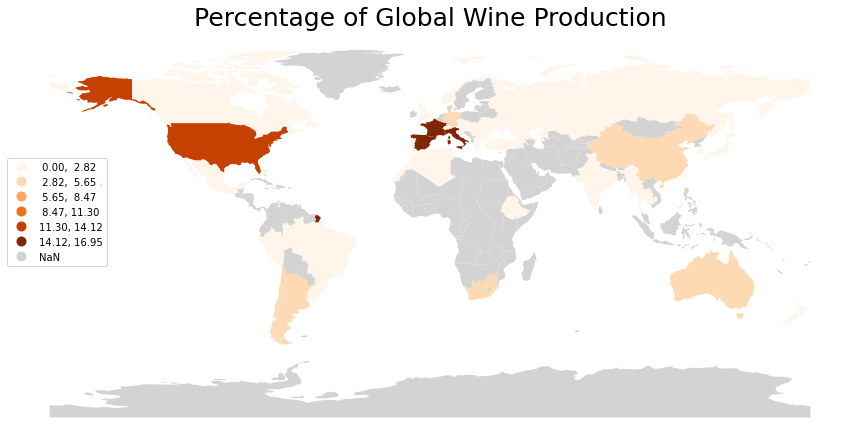

In [194]:
ax = prodplot.plot(column='global_prod', cmap =    
                                'Oranges', figsize=(15,9),   
                                 scheme='equalinterval',k=6, legend =  
                                  True, missing_kwds={'color': 'lightgrey'});
#add title to the map
ax.set_title('Percentage of Global Wine Production', fontdict= 
            {'fontsize':25})
#remove axes
ax.set_axis_off()
#move legend to an empty space
ax.get_legend().set_bbox_to_anchor((.12,.7))
